In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')

In [3]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


#Data Preprocessing

In [4]:
data.shape # check the shape of the dataset


(7920, 3)

In [5]:
#check duplicated values
data.duplicated()



0       False
1       False
2       False
3       False
4       False
        ...  
7915    False
7916    False
7917    False
7918    False
7919    False
Length: 7920, dtype: bool

In [6]:
#check sum of duplicated values
data.duplicated().sum()

np.int64(0)

In [7]:
data.isnull().sum() # check null values in the dataset

id       0
label    0
tweet    0
dtype: int64

## Text Preprocessing

- Convert Uppercase to Lowercase
- Remove Links
- Remove Punctuations
- Remove Numbers
- Remove Stopwords
- Stemming

In [8]:
import re
import string

In [9]:
data["tweet"].head(5) # check the tweets before text preprocessing

0    #fingerprint #Pregnancy Test https://goo.gl/h1...
1    Finally a transparant silicon case ^^ Thanks t...
2    We love this! Would you go? #talk #makememorie...
3    I'm wired I know I'm George I was made that wa...
4    What amazing service! Apple won't even talk to...
Name: tweet, dtype: object

## Convert uppercase to lowercase

In [10]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split())) # convert to lowercase

In [11]:
data["tweet"].head(5) # check the tweets before text preprocessing

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

## remove links

In [12]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x,flags=re.MULTILINE) for x in x.split())) # remove URLs
#steps to remove URLs from the tweets
# 1. Use the re.sub() function to search for patterns that match URLs in the text.
# 2. The pattern r'^https?:\/\/.*[\r\n]*' is a regular expression that matches URLs starting with "http://" or "https://".
# 3. The flags=re.MULTILINE argument allows the pattern to match URLs that may span multiple lines.
# 4. The lambda function applies this substitution to each tweet in the "tweet" column.
# 5. The cleaned tweets are then joined back into a single string for each tweet.

#https url check each row and if found replace with empty string ' '


In [13]:
data['tweet'].head(5) # check the tweets after removing URLs

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

## remove punctuations

In [14]:
string.punctuation # check the string punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [15]:
def remove_punctuation(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text
 #check punctuation in the each row and remove them and place with empty string ' '
data["tweet"] = data["tweet"].apply(remove_punctuation) # remove punctuation from the tweets

In [16]:
data["tweet"].head(5) # check the tweets after removing punctuation

0    fingerprint pregnancy test  android apps beaut...
1    finally a transparant silicon case  thanks to ...
2    we love this would you go talk makememories un...
3    im wired i know im george i was made that way ...
4    what amazing service apple wont even talk to m...
Name: tweet, dtype: object

## Remove number

In [17]:
data["tweet"] = data['tweet'].str.replace(r'\d+', '', regex=True) # remove numbers from the tweets


In [18]:
data['tweet'].tail(5) # check the tweets after removing numbers

7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

## Remove Stop words

In [19]:
import nltk # natural language toolkit
#why need nltk
# to perform text preprocessing tasks such as tokenization, stemming, lemmatization, and stopword removal.

In [20]:
nltk.download('stopwords', download_dir='../static/model/')  # download stopwords from nltk


[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1032)>


False

In [21]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()  # read stopwords from the downloaded file

In [22]:
sw

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [23]:
data['tweet'] = data['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in sw)) # remove stopwords from the tweets

In [24]:
data['tweet'].head(5) # check the tweets after removing stopwords

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

## Stemming

In [25]:
from nltk.stem import PorterStemmer
ps = PorterStemmer() # initialize the PorterStemmer


In [26]:
data['tweet'] = data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split())) # apply stemming to the tweets

In [27]:
data['tweet'].head(5) # check the tweets after removing stopwords

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

In [28]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


## Building Vocabulary

In [29]:
from collections import Counter
# Counter is a subclass of dict that helps count hashable objects. It is an unordered collection where elements are stored as dictionary keys and their counts are stored as dictionary values. It is part of the collections module in Python's standard library.
vocab = Counter() 

In [30]:
vocab # check the empty vocabulary

Counter()

In [31]:
for sentence in data['tweet']:
   vocab.update(sentence.split()) # update the vocabulary with words from each tweet

In [32]:
#vocab # check the vocabulary
len(vocab) # check the length of the vocabulary

15949

In [33]:
data.shape

(7920, 3)

In [34]:
tokens = [key for key in vocab if vocab[key] > 10]
# tokens # check the tokens with frequency greater than 10


In [35]:
tokens # check the tokens with frequency greater than 10

['test',
 'android',
 'app',
 'beauti',
 'cute',
 'health',
 'iger',
 'iphoneonli',
 'iphonesia',
 'iphon',
 'final',
 'case',
 'thank',
 'yay',
 'soni',
 'xperia',
 'love',
 'would',
 'go',
 'talk',
 'relax',
 'smartphon',
 'wifi',
 'connect',
 'im',
 'know',
 'made',
 'way',
 'home',
 'amaz',
 'servic',
 'appl',
 'wont',
 'even',
 'question',
 'pay',
 'stupid',
 'support',
 'softwar',
 'updat',
 'fuck',
 'phone',
 'big',
 'time',
 'happi',
 'us',
 'instap',
 'instadaili',
 'xperiaz',
 'new',
 'type',
 'c',
 'charger',
 'cabl',
 'uk',
 '…',
 'amazon',
 'year',
 'newyear',
 'start',
 'technolog',
 'samsunggalaxi',
 'iphonex',
 'shop',
 'listen',
 'music',
 'likeforlik',
 'photo',
 'fun',
 'selfi',
 'water',
 'camera',
 'picoftheday',
 'sun',
 'instagood',
 'boy',
 'outdoor',
 'hey',
 'make',
 'ipod',
 'dont',
 'color',
 'inch',
 'crash',
 'everi',
 'need',
 'realli',
 'drop',
 'ball',
 'design',
 'give',
 'anoth',
 'crazi',
 'purchas',
 'lol',
 'work',
 'hard',
 'play',
 'ipad',
 'batt

In [36]:
len(tokens)

1145

In [37]:
def save_vocabulary(lines,filename):  
    data = '\n'.join(lines)
    file = open(filename, 'w',encoding='utf-8')
    file.write(data)
    file.close()
save_vocabulary(tokens,'../static/model/vocabulary.txt')
#SET token to txt file

## Divide dataset

In [38]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


In [39]:
x = data['tweet']
y = data['label']

In [40]:
from sklearn.model_selection import train_test_split

# -------------------------------------------------------------
#  train_test_split() — Explanation (Comment by Vishan)
#
#  x -> all input features (example: vectorized sentences)
#  y -> all labels (example: positive/negative values)
#
#  What this function does:
#  It splits the dataset into two parts:
#      1) Training set  -> used to train the model
#      2) Testing set   -> used to evaluate the model
#
#  test_size = 0.2 means:
#      20% of the data -> goes to testing
#      80% of the data -> goes to training
#
#  So x_train, y_train -> 80% of data
#     x_test,  y_test  -> 20% of data
#
#  Why split?
#  To make sure the model learns from one part and is tested on
#  completely new data, so we can check how well it performs.
# -------------------------------------------------------------

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [41]:
x_train.shape

(6336,)

In [42]:
x_test.shape

(1584,)

In [43]:
x_train

7199    coldest night last night c guest still happi n...
2722    io come fall io instas nice good app iphon sof...
374     iphon itun piss might well restor whole phone ...
6484            addict special relationship phone samsung
146     deepeshalway ndtvgadget enough money challeng ...
                              ...                        
280     fuck appl man wanna use wifi your tell use wif...
7458    hack wifi android app beauti cute color iger i...
1247    follow us entertain pictur video come furri fr...
2556    final upgrad year bye bye blackberri hello and...
5988    wind tree haveaniceday french mothersday timel...
Name: tweet, Length: 6336, dtype: object

In [44]:
x_test

6688    clue charact color look cool cosplay misamisar...
6102    sunris one minut ago europ zeeland samsung hag...
6761    look nut ollo olloclip washington money art go...
4011    come tablet ima gon netflix yo ass itssamsung ...
5039    photo moment photo motorola android smartphon ...
                              ...                        
896     wifi hake password android app unitedst cute c...
6457    never tire watch sky beauti autumn sky sceneri...
6601    eboni coffe tabl final coat ridgid ryobi trout...
5242    u luv sumu marri sum elseth u marri becom ur s...
6404                  th iphon charger alreadi break appl
Name: tweet, Length: 1584, dtype: object

In [45]:
y_train

7199    0
2722    0
374     1
6484    0
146     1
       ..
280     1
7458    0
1247    0
2556    0
5988    0
Name: label, Length: 6336, dtype: int64

### Vectorization

In [46]:
def vectorizer(ds, vocabluary):
    # -----------------------------------------------------
    #  How this works (Comment by Vishan)
    #
    #  ds = list of preprocessed sentences
    #  vocabluary = list of unique words (vocabulary)
    #
    #  For each sentence, we create a vector of 1s and 0s
    #  depending on whether a vocabulary word appears in
    #  that sentence.
    #
    #  Example:
    #   vocabulary = ["love", "movie", "bad"]
    #   sentence = "I love this movie"
    #   vector = [1, 1, 0]
    #
    #  This is called a Bag-of-Words binary vector.
    # -----------------------------------------------------

    vectorized_1st = []   # A list to store the vector for each sentence

    for sentence in ds:   # Loop through each sentence in the dataset
        sentence_1st = np.zeros(len(vocabluary))
        # Create a vector filled with zeros
        # Length = vocabulary size
        # Example: vocab size = 6 → [0,0,0,0,0,0]

        # Loop through each word in the vocabulary
        for i in range(len(vocabluary)):

            # Check if this vocabulary word appears in the sentence
            # sentence.split() breaks the sentence into individual words
            if vocabluary[i] in sentence.split():
                sentence_1st[i] = 1
                # If the word exists in the sentence → set that index to 1

        vectorized_1st.append(sentence_1st)  
        # Add the generated vector to the main list

    # Convert the list of vectors into a NumPy array (float32 type)
    vectorized_1st_new = np.asarray(vectorized_1st, dtype=np.float32)

    return vectorized_1st_new  
    # Return the final vectorized dataset


In [47]:
vectorized_x_train = vectorizer(x_train,tokens)

In [48]:
vectorized_x_test = vectorizer(x_test,tokens)

In [49]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(6336, 1145), dtype=float32)

In [50]:
y_train

7199    0
2722    0
374     1
6484    0
146     1
       ..
280     1
7458    0
1247    0
2556    0
5988    0
Name: label, Length: 6336, dtype: int64

In [51]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(1584, 1145), dtype=float32)

In [52]:
y_test

6688    0
6102    0
6761    0
4011    1
5039    0
       ..
896     0
6457    0
6601    0
5242    0
6404    1
Name: label, Length: 1584, dtype: int64

In [53]:
y_train.value_counts()

label
0    4711
1    1625
Name: count, dtype: int64

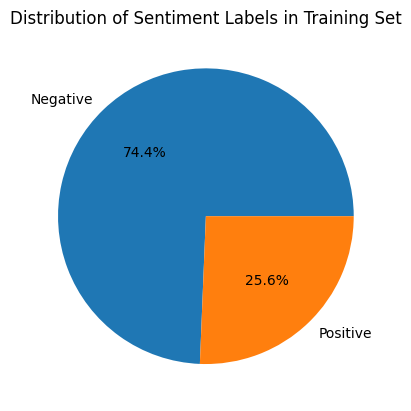

In [54]:
plt.pie(np.array(y_train.value_counts()), labels=['Negative', 'Positive'], autopct='%1.1f%%')
plt.title('Distribution of Sentiment Labels in Training Set')
plt.show()

# Handle Imbalanced dataset

In [55]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(9422, 1145) (9422,)


In [56]:
y_train_smote.value_counts()

label
0    4711
1    4711
Name: count, dtype: int64

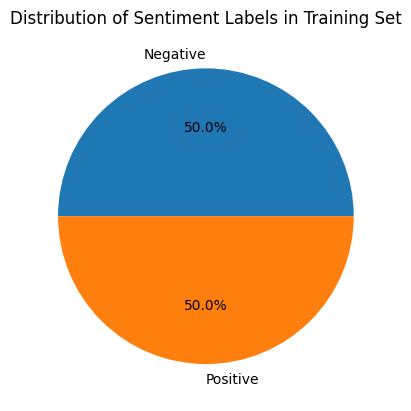

In [57]:
plt.pie(np.array(y_train_smote.value_counts()), labels=['Negative', 'Positive'], autopct='%1.1f%%')
plt.title('Distribution of Sentiment Labels in Training Set')
plt.show()

In [58]:
vectorized_x_train_smote

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.72183305, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], shape=(9422, 1145), dtype=float32)

In [59]:
y_train_smote

0       0
1       0
2       1
3       0
4       1
       ..
9417    1
9418    1
9419    1
9420    1
9421    1
Name: label, Length: 9422, dtype: int64

In [60]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(1584, 1145), dtype=float32)

In [61]:
y_test

6688    0
6102    0
6761    0
4011    1
5039    0
       ..
896     0
6457    0
6601    0
5242    0
6404    1
Name: label, Length: 1584, dtype: int64

## Model Training and Evolution

In [62]:
from sklearn.linear_model import LogisticRegression
# -------------------------------------------------------------
# LogisticRegression:
# A simple and fast machine learning classifier.
# Works well for text classification (sentiment analysis).
# It tries to find the best boundary (line) that separates
# positive vs negative sentences.
# -------------------------------------------------------------

from sklearn.naive_bayes import MultinomialNB
# -------------------------------------------------------------
# MultinomialNB (Multinomial Naive Bayes):
# One of the most popular algorithms for text classification.
# Works extremely well with Bag-of-Words or TF-IDF data.
# Assumes each word contributes independently to the final result.
# Very fast and efficient.
# -------------------------------------------------------------

from sklearn.tree import DecisionTreeClassifier
# -------------------------------------------------------------
# DecisionTreeClassifier:
# Creates a tree-like model of decisions:
# Example:
#   if "good" in sentence → go left
#   else                  → go right
# Easy to visualize and understand but may overfit.
# -------------------------------------------------------------

from sklearn.ensemble import RandomForestClassifier
# -------------------------------------------------------------
# RandomForestClassifier:
# A collection of many Decision Trees working together.
# Each tree gives a prediction → majority vote = final output.
# More accurate and stable than a single Decision Tree.
# Good for complex datasets.
# -------------------------------------------------------------

from sklearn.svm import SVC
# -------------------------------------------------------------
# SVC (Support Vector Classifier):
# A powerful algorithm that tries to find the best separating
# hyperplane (boundary) between classes.
# Works well for high-dimensional data like text vectors.
# Sometimes slower, but gives high accuracy.
# -------------------------------------------------------------


In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred),3)
    pr = round(precision_score(y_act, y_pred),3)
    rec = round(recall_score(y_act, y_pred),3)
    f1 = round(f1_score(y_act, y_pred),3)
    print(f"Training score: \n\tAccuracy: {acc}, Precision: {pr}, Recall: {rec}, F1-Score: {f1}")

def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred),3)
    pr = round(precision_score(y_act, y_pred),3)
    rec = round(recall_score(y_act, y_pred),3)
    f1 = round(f1_score(y_act, y_pred),3)
    print(f"Validation score: \n\tAccuracy: {acc}, Precision: {pr}, Recall: {rec}, F1-Score: {f1}")
    

## Logistic Regression

In [64]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = lr.predict(vectorized_x_train_smote)

y_test_pred = lr.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training score: 
	Accuracy: 0.939, Precision: 0.915, Recall: 0.968, F1-Score: 0.94
Validation score: 
	Accuracy: 0.878, Precision: 0.72, Recall: 0.848, F1-Score: 0.779


## Naive Bayes

In [65]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_smote)

y_test_pred = mnb.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training score: 
	Accuracy: 0.906, Precision: 0.866, Recall: 0.961, F1-Score: 0.911
Validation score: 
	Accuracy: 0.878, Precision: 0.698, Recall: 0.913, F1-Score: 0.791


## Decision Tree

In [66]:
dt = DecisionTreeClassifier    ()
dt.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_smote)

y_test_pred = dt.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training score: 
	Accuracy: 1.0, Precision: 1.0, Recall: 0.999, F1-Score: 1.0
Validation score: 
	Accuracy: 0.831, Precision: 0.674, Recall: 0.643, F1-Score: 0.658


## Random Forest

In [67]:
rf = RandomForestClassifier()
rf.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = rf.predict(vectorized_x_train_smote)

y_test_pred = rf.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training score: 
	Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1-Score: 1.0
Validation score: 
	Accuracy: 0.866, Precision: 0.754, Recall: 0.696, F1-Score: 0.724


## Support Vector Machine

In [68]:
svm = SVC()
svm.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = svm.predict(vectorized_x_train_smote)

y_test_pred = svm.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training score: 
	Accuracy: 0.978, Precision: 0.962, Recall: 0.995, F1-Score: 0.979
Validation score: 
	Accuracy: 0.887, Precision: 0.752, Recall: 0.825, F1-Score: 0.787


In [69]:
import pickle
# Save the trained Logistic Regression model
with open('../static/model/model.pickle', 'wb') as file:
    pickle.dump(lr, file)